## Lesson 14: Plotting in Python

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 100

In [26]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Categorical Variables

## Bar Plot

A bar plot displays the counts of the labels from a categorical column. This can be done using `pandas`

```
df.plot.bar()
```

or using `matplotlib`

```
plt.bar()
```

In [27]:
tbl = titanic.embark_town.value_counts()
tbl

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [28]:
tbl.index

Index(['Southampton', 'Cherbourg', 'Queenstown'], dtype='object')

Make a bar chart using `plt.bar()` for the counts of the `embark_town` column.

**Note:** 

- `x` represents the categories.

- `height` represents the corresponding heights.

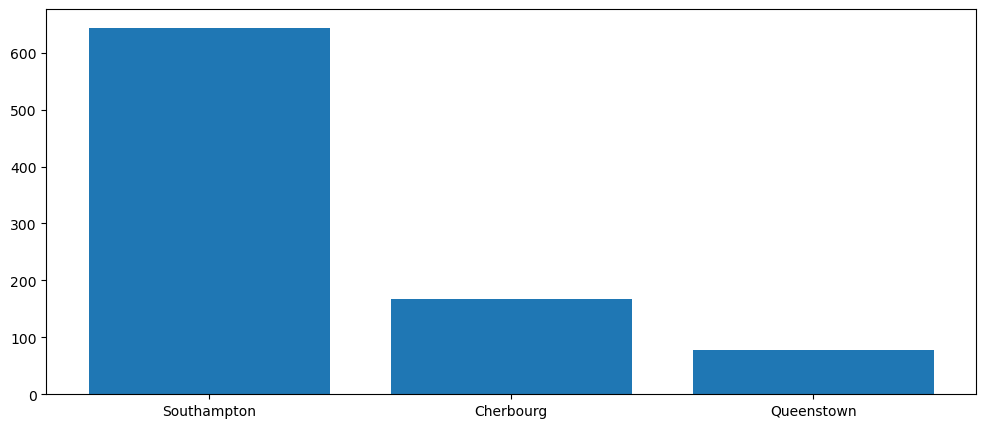

In [29]:
plt.bar(x = tbl.index, height = tbl);

We can make the same bar plot using `pandas`.

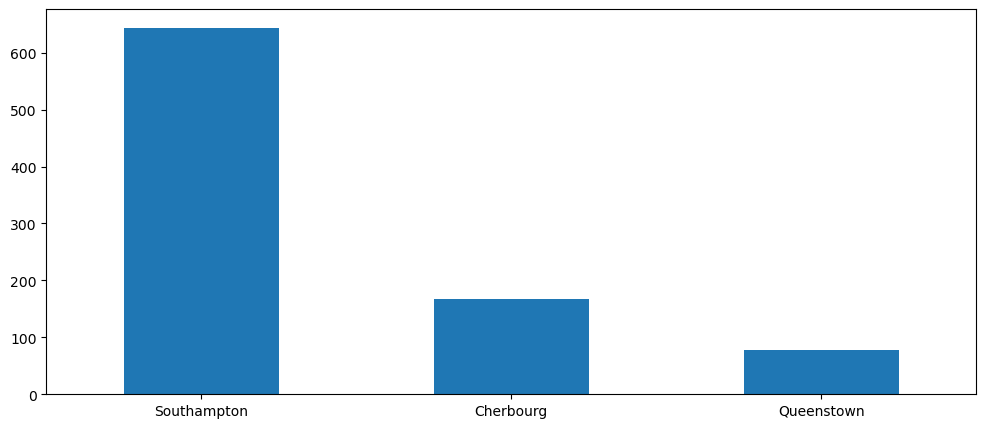

In [30]:
tbl.plot.bar(rot = 0);

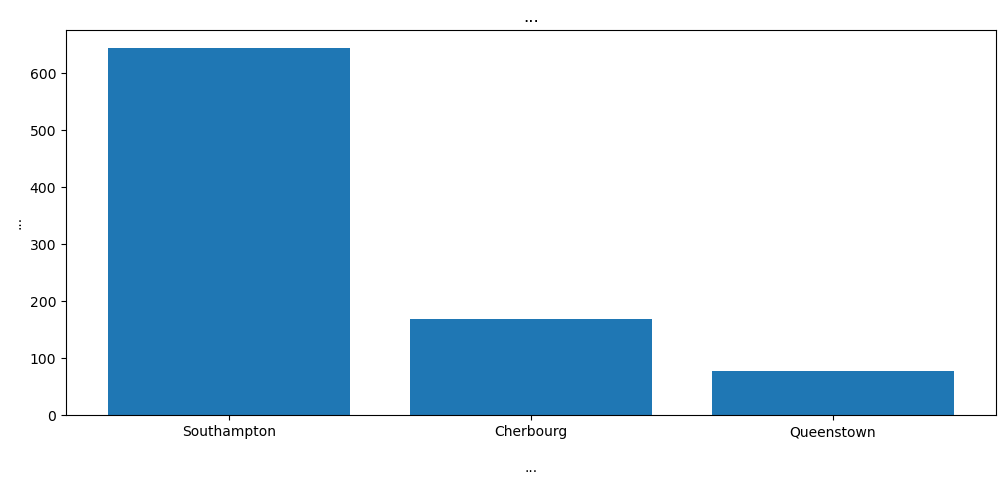

In [31]:
plt.bar(x = ["Southampton", "Cherbourg", "Queenstown"], height = tbl)
plt.title("...")
plt.xlabel("\n...")
plt.ylabel("...");

In [32]:
two_way_tbl = pd.crosstab(titanic.embark_town, titanic.survived)
two_way_tbl

survived,0,1
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


### Stacked Bar Plot

**Example 1.** Let's use the `two_way_tbl` dataframe to create a stacked bar plot.

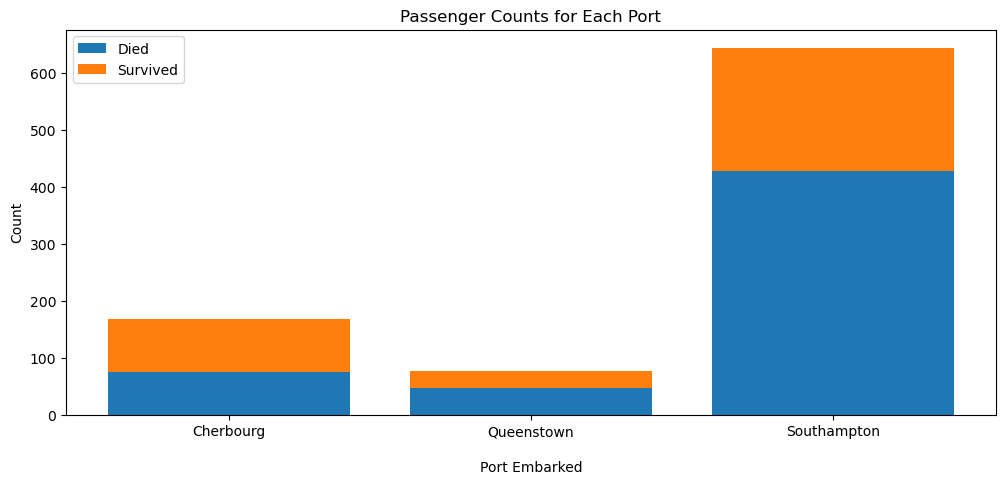

In [34]:
p1 = plt.bar(x = ["Cherbourg", "Queenstown", "Southampton"],
             height = two_way_tbl.loc[:, 0], label = 'Died')

p2 = plt.bar(x = ["Cherbourg", "Queenstown", "Southampton"],
             height = two_way_tbl.loc[:, 1],
             bottom = two_way_tbl.loc[:, 0], label = 'Survived')

plt.title("Passenger Counts for Each Port")
plt.xlabel("\nPort Embarked")
plt.ylabel("Count")
plt.legend();

**Example 2.**  We can prodcue the same plot using `tbl.plot.bar()`.

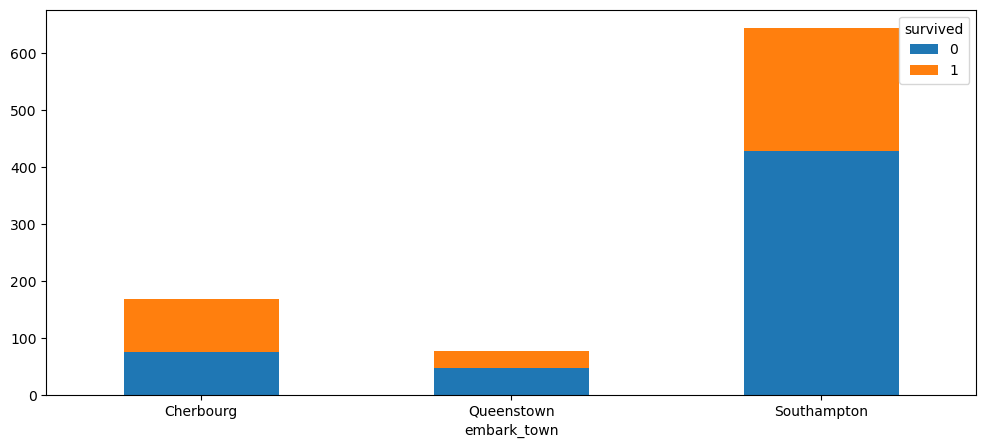

In [35]:
two_way_tbl.plot.bar(stacked = True, rot = 0);

**Example 3.** The `.plot.bar()` function returns a `matplotlib.axes.AxesSubplot` object. We can set the labels on that object.

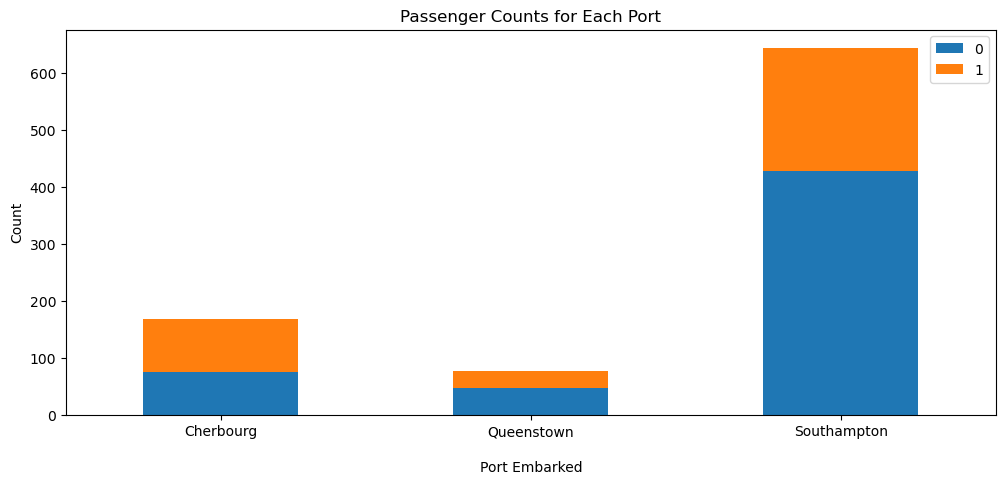

In [36]:
ax = two_way_tbl.plot.bar(stacked = True, rot = 0)
ax.set_title("Passenger Counts for Each Port")
ax.set_xlabel("\nPort Embarked")
ax.set_ylabel("Count")
ax.legend();

### Side by Side Bar Plots

**Example 4.** We can make side by side bar plots with `.plot.bar()`.

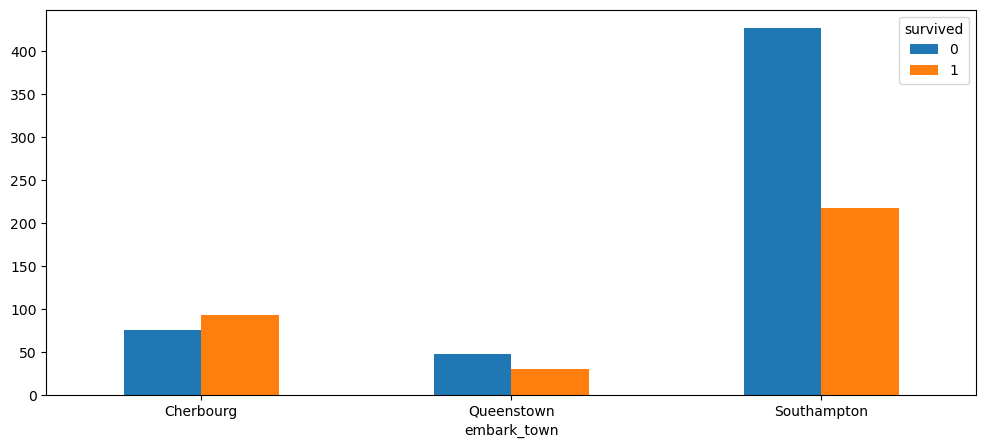

In [37]:
two_way_tbl.plot.bar(rot = 0);

We can add a title and axes labels to your plot from **Example 4**.

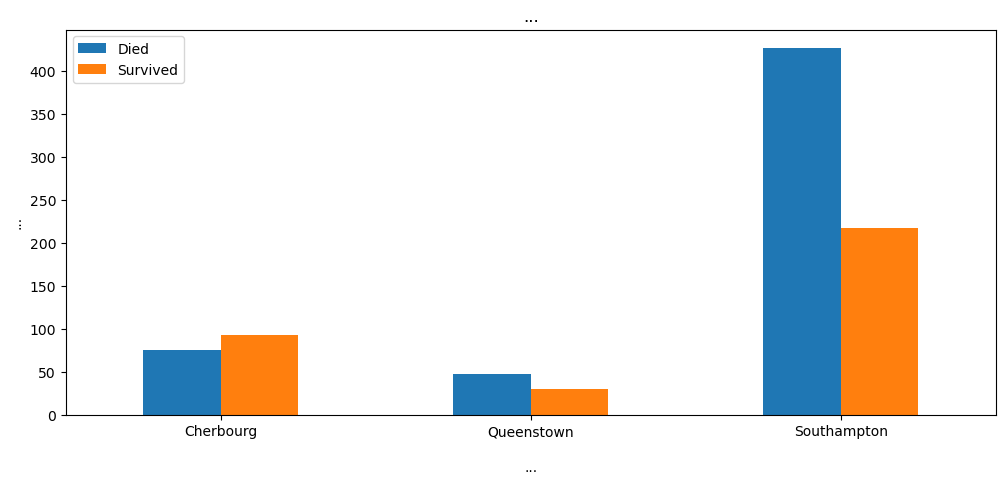

In [47]:
ax = two_way_tbl.plot.bar(rot = 0)
ax.set_title("...")
ax.set_xlabel("\n...")
ax.set_ylabel("...")
ax.legend(labels = ["Died", "Survived"], loc = "upper left");

## Numerical Variables

### Histograms

A histogram is an approximate representation of the distribution (the frequency and pattern) of numerical data.

Now let's look at the distribution of the ages of the passengers on the titanic.

**Example 5.** Use `.hist()` to plot a histogram of the ages of the passengers on the titanic.

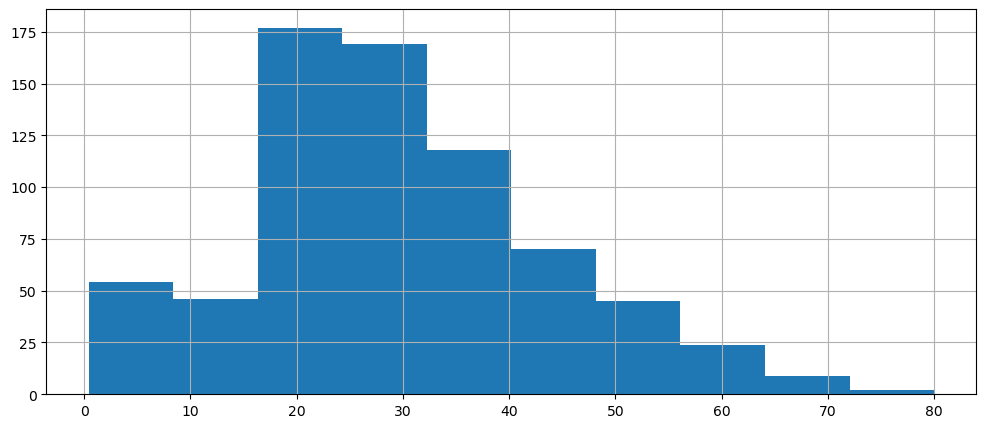

In [17]:
titanic.age.hist();

**Example 6.** Customize the plot from **Example 5.** by removing the gridlines, and, adding axes labels and a title.

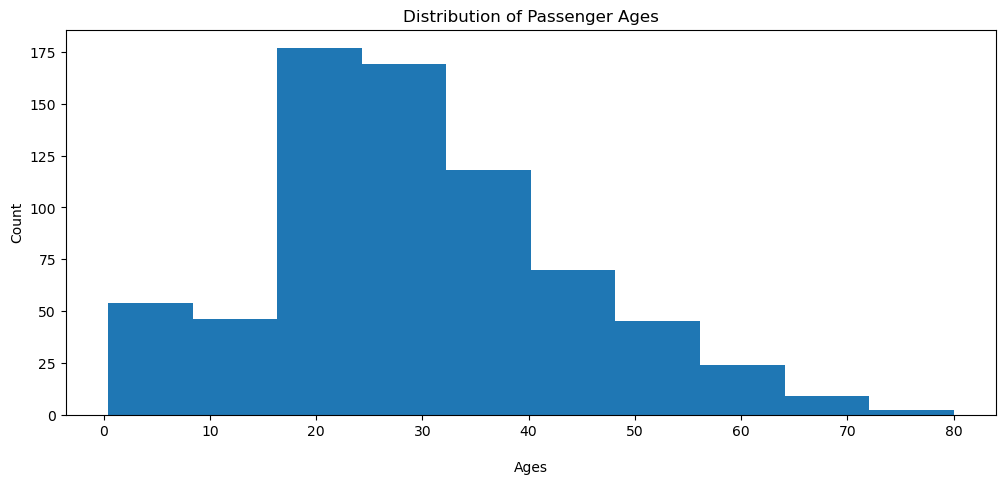

In [48]:
ax = titanic.age.hist()
ax.grid(False)
ax.set_title("Distribution of Passenger Ages")
ax.set_xlabel("\nAges")
ax.set_ylabel("Count");

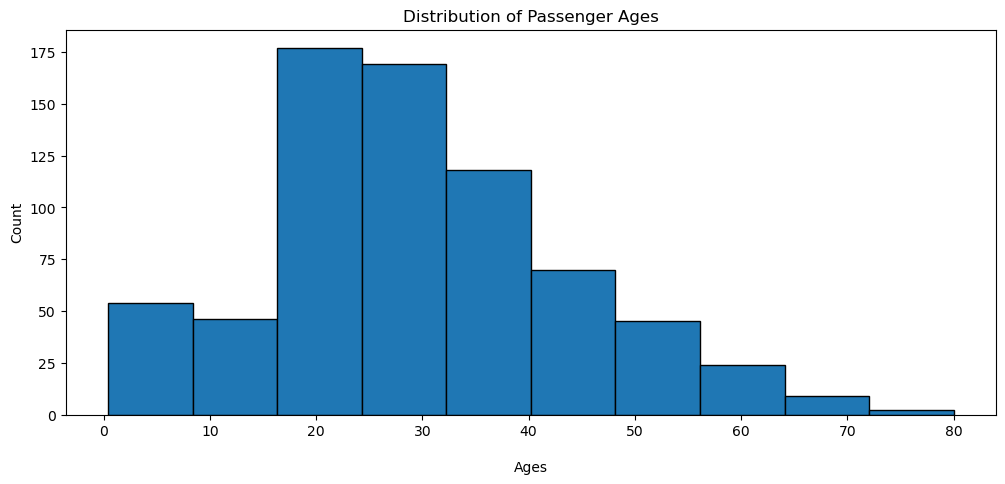

In [49]:
ax = titanic.age.hist(edgecolor = "black")
ax.grid(False)
ax.set_title("Distribution of Passenger Ages")
ax.set_xlabel("\nAges")
ax.set_ylabel("Count");

**Example 7.** We can also customize the bars.

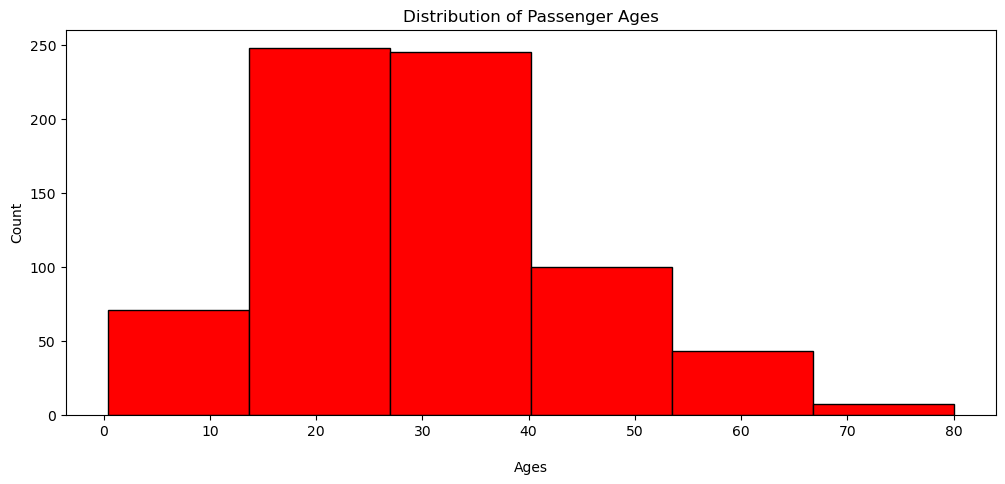

In [20]:
ax = titanic.age.hist(color = "red", edgecolor = "black", bins = 6)
ax.grid(False)
ax.set_title("Distribution of Passenger Ages")
ax.set_xlabel("\nAges")
ax.set_ylabel("Count");

In [ ]:
**Example 8.** We can also customize the number of bins and the bin locations.

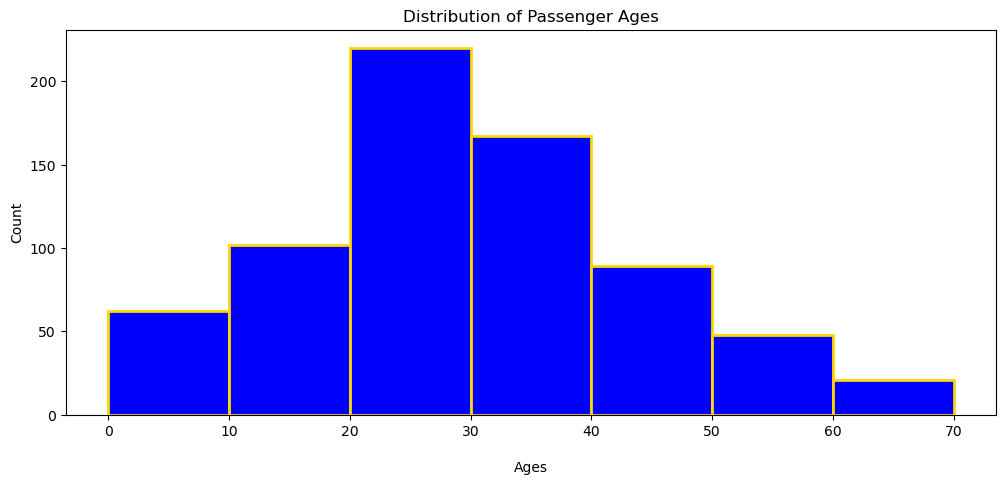

In [52]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
ax = titanic.age.hist(color = "blue", edgecolor = "gold", bins = bins, linewidth = 2)
ax.grid(False)
ax.set_title("Distribution of Passenger Ages")
ax.set_xlabel("\nAges")
ax.set_ylabel("Count");

**Example 9.**  We can also compare across distributions using `by = `.

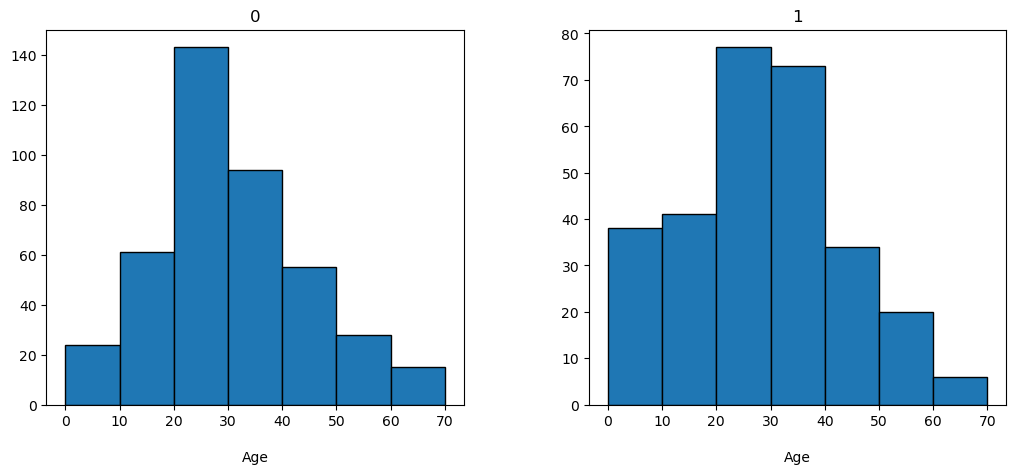

In [54]:
ax = titanic.age.hist(edgecolor = "black", bins = bins, by = titanic.survived, rot = 0)
ax[0].set_xlabel("\nAge")
ax[1].set_xlabel("\nAge");

**Example 10.** We can also make overlayed histograms.

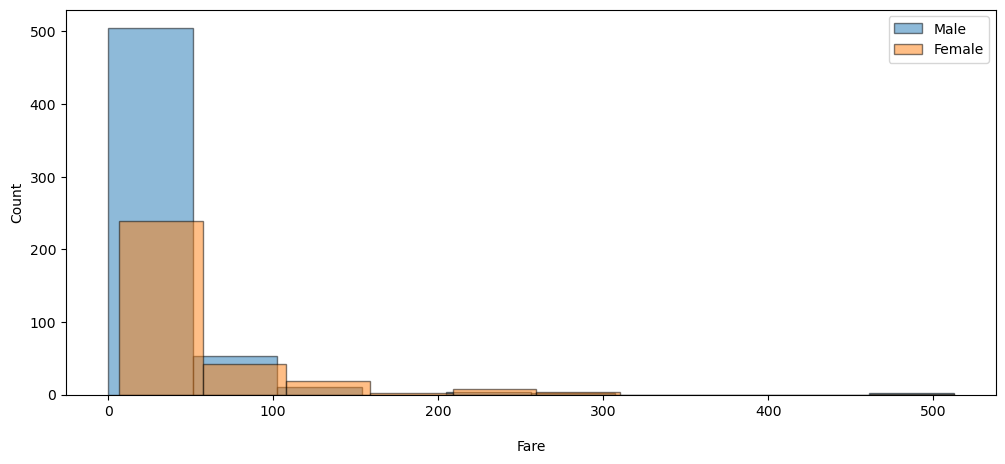

In [56]:
male = titanic.loc[titanic.sex == 'male'].fare
female = titanic.loc[titanic.sex == 'female'].fare
num_bins = 10
ax = male.hist(bins = num_bins, alpha = 0.5, label = 'Male', edgecolor = 'black')
ax = female.hist(bins = num_bins, alpha = 0.5, label = 'Female', edgecolor = 'black')
ax.grid(False)
ax.set_xlabel("\nFare")
ax.set_ylabel("Count")
ax.legend();

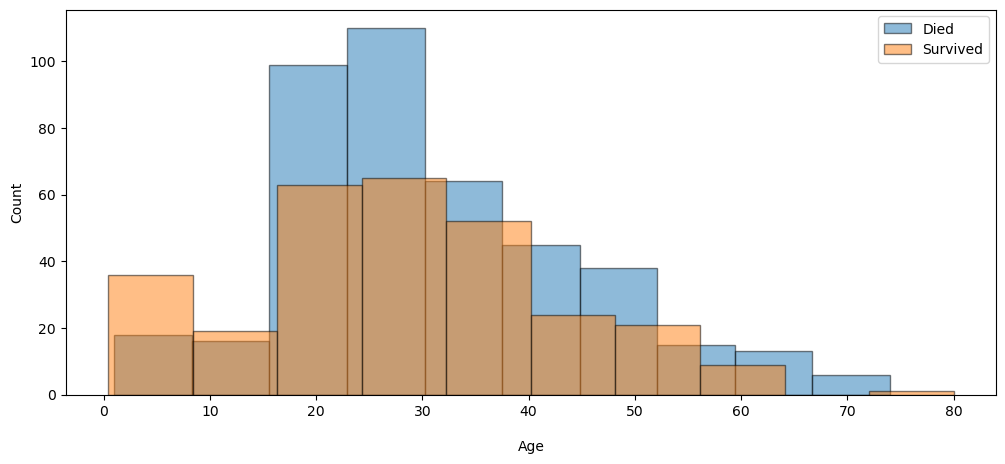

In [57]:
age_died = titanic.loc[titanic.survived == 0, "age"]
age_survived = titanic.loc[titanic.survived == 1, "age"]
ax = age_died.hist(alpha = 0.5, label = 'Died', edgecolor = 'black')
ax = age_survived.hist(alpha = 0.5, label = 'Survived', edgecolor = 'black')
ax.grid(False)
ax.set_xlabel("\nAge")
ax.set_ylabel("Count")
ax.legend();

### Scatter Plots

A scatter plot is used to visualize the linear relationship between variables.

**Example 11.** Make a scatter plot using `Age` to predict `Fare`.

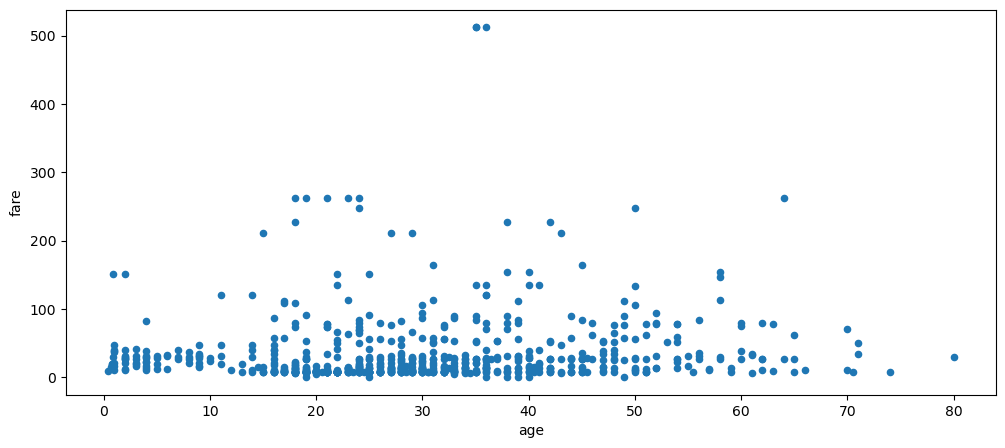

In [24]:
titanic.plot.scatter(x = "age", y = "fare");

If we want we can customize the marker type and size.

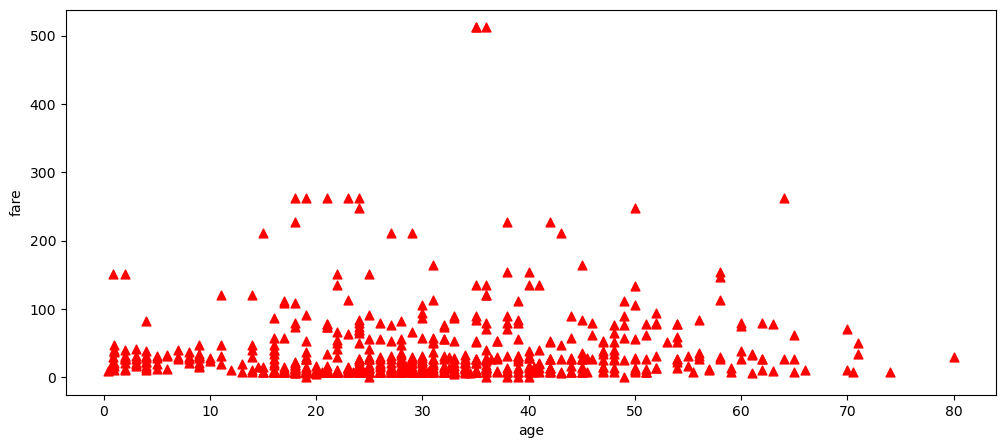

In [59]:
titanic.plot.scatter(x = "age", y = "fare", c = "red", s = 40, marker = "^");

In [60]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [61]:
life_exp = sns.load_dataset('healthexp')
life_exp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


### Line Chart

A line chart is similar to a scatter plot except that the measurement points are ordered and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically.

**Example 13.** A line chart that shows the life expectancy worldwide on average is increasing.

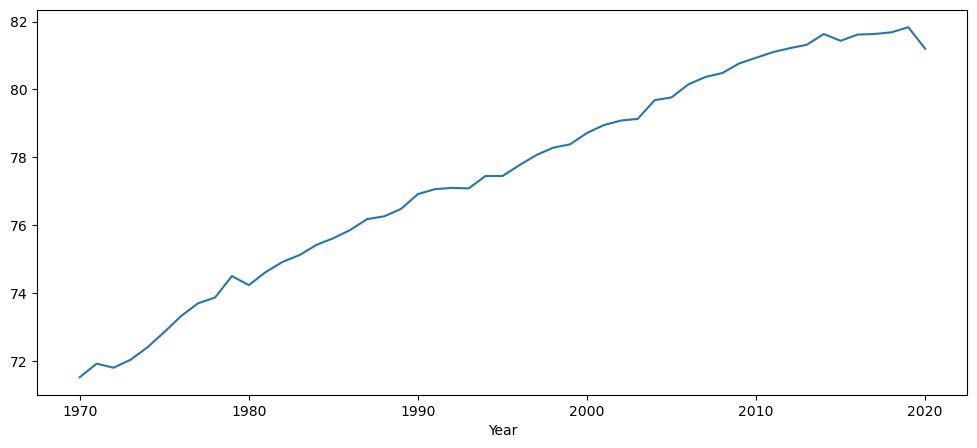

In [71]:
life_exp.groupby('Year').Life_Expectancy.agg(np.mean).plot();

### Box Plots

A box plot displays the five-number summary of a set of data.

- Min, Q1, Median, Q3, and Max

- Shows possible outliers

**Example 14.** A boxplot of the `age` variable.

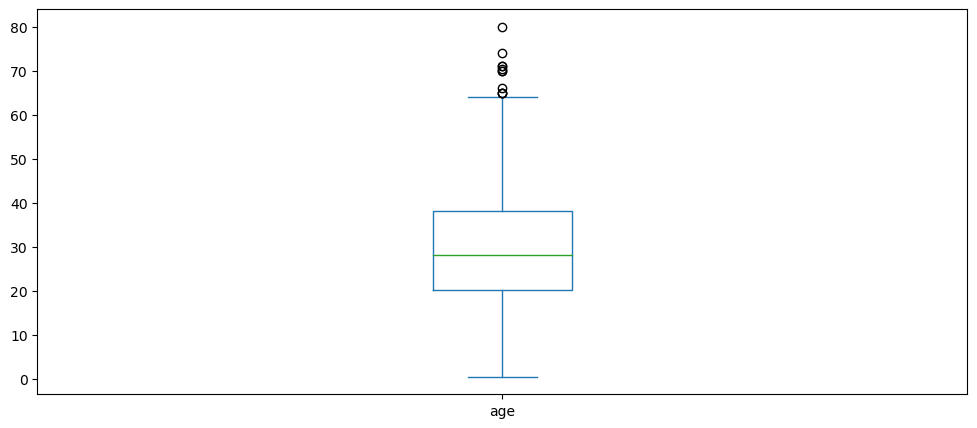

In [72]:
titanic.age.plot.box();

A boxplot grouped by `survived`.

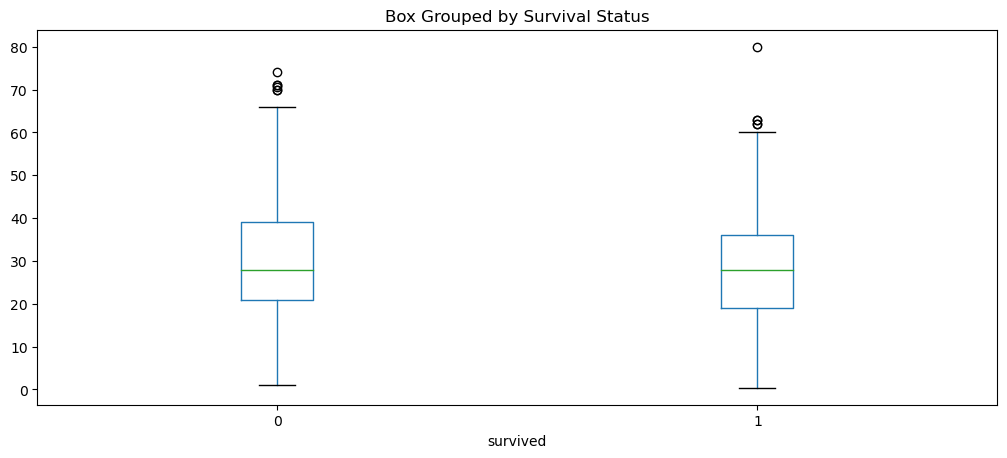

In [74]:
titanic.boxplot(column = "age", by = "survived")
plt.grid(False)
plt.suptitle("")
plt.title("Box Grouped by Survival Status");

For the remainder of this notebook you will create your own plots using data from the `penguins` dataframe.

**Note:** Be sure to provide a title and label your axes.

Run the cell below.

In [76]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Level I

**Question 1.** Choose a categorical column from the `penguins` dataframe. Then use the data to create a bar plot.

**Note:** Be sure to provide a title and label your axes.

In [ ]:
...

**Question 2.** Choose a numerical column from the `penguins` dataframe. Then use the data to create a histogram.

**Note:** Be sure to provide a title and label your axes.

In [ ]:
...

**Question 3.** Choose two numerical columns from the `penguins` dataframe. Then use the data to create a scatter plot.

**Note:** Be sure to provide a title and label your axes.

In [ ]:
...

**Question 4.** Use data from the `penguins` dataframe to create a overlayed histogram.

**Note:** Be sure to provide a title and label your axes.

In [ ]:
...